In [24]:
import pandas as ps
ds=ps.read_csv("project shets - Purchase_Details_new.csv")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Purchase_ID        2500 non-null   int64  
 1   Buyer_ID           2495 non-null   float64
 2   Mood               2321 non-null   object 
 3   Emotion_Intensity  2495 non-null   float64
 4   Product_Category   2469 non-null   object 
 5   Product_Name       2480 non-null   object 
 6   Brand              2474 non-null   object 
 7   Amount             2323 non-null   float64
 8   Discount(%)        2323 non-null   float64
 9   Payment_Mode       2499 non-null   object 
 10  Purchase_Date      2497 non-null   object 
 11  Purchase_Time      2498 non-null   object 
 12  Device_Used        2495 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 254.0+ KB


In [25]:
ds.head()

,Purchase_ID,Buyer_ID,Mood,Emotion_Intensity,Product_Category,Product_Name,Brand,Amount,Discount(%),Payment_Mode,Purchase_Date,Purchase_Time,Device_Used
0,1,1.0,Excited,7.0,Electronics,Laptop,BrandD,3087.0,0.0,Debit Card,2025-01-01,0 days 00:35:34,Tablet
1,2,2.0,Excited,5.0,NaN,Lipstick,BrandB,4543.0,34.0,Credit Card,2025-01-02,0 days 18:05:26,Tablet
2,3,3.0,Excited,1.0,Clothing,T-shirt,BrandA,4828.0,35.0,Credit Card,2025-01-03,0 days 14:06:31,Mobile
3,4,4.0,Calm,7.0,Cosmetics,Lipstick,BrandB,3730.0,37.0,Cash,2025-01-04,0 days 11:29:39,NaN
4,5,5.0,Calm,7.0,Food,Pizza,BrandB,989.0,38.0,Credit Card,2025-01-05,0 days 23:46:49,NaN


In [26]:
ds.tail()

,Purchase_ID,Buyer_ID,Mood,Emotion_Intensity,Product_Category,Product_Name,Brand,Amount,Discount(%),Payment_Mode,Purchase_Date,Purchase_Time,Device_Used
2495,2496,2496.0,Calm,5.0,Food,Pizza,BrandB,1561.0,47.0,Debit Card,2031-11-01,0 days 10:27:29,Laptop
2496,2497,2497.0,NaN,4.0,Books,Novel,BrandC,986.0,38.0,Cash,2031-11-02,0 days 07:28:48,Laptop
2497,2498,2498.0,Sad,9.0,Clothing,T-shirt,BrandA,755.0,40.0,UPI,2031-11-03,0 days 23:55:17,Tablet
2498,2499,2499.0,Angry,9.0,Electronics,Laptop,BrandD,2239.0,24.0,Credit Card,2031-11-04,0 days 06:41:45,Mobile
2499,2500,2500.0,Sad,2.0,Clothing,T-shirt,BrandA,1962.0,24.0,Debit Card,2031-11-05,0 days 05:30:43,Tablet


In [27]:
ds.describe()

,Purchase_ID,Buyer_ID,Emotion_Intensity,Amount,Discount(%)
count,2500.00000,2495.000000,2495.000000,2323.000000,2323.000000
mean,1250.50000,1248.450902,5.022445,2594.725786,24.560052
std,721.83216,721.100304,2.620530,1367.874776,14.519736
min,1.00000,1.000000,1.000000,202.000000,0.000000
25%,625.75000,624.500000,3.000000,1403.500000,12.000000
50%,1250.50000,1248.000000,5.000000,2625.000000,25.000000
75%,1875.25000,1871.500000,7.000000,3788.000000,37.000000
max,2500.00000,2500.000000,9.000000,4996.000000,49.000000


In [28]:
ds.shape

(2500, 13)

In [29]:
ds.columns

Index(['Purchase_ID', 'Buyer_ID', 'Mood', 'Emotion_Intensity',
       'Product_Category', 'Product_Name', 'Brand', 'Amount', 'Discount(%)',
       'Payment_Mode', 'Purchase_Date', 'Purchase_Time', 'Device_Used'],
      dtype='object')

In [30]:
ds.isnull().sum()

Purchase_ID            0
Buyer_ID               5
Mood                 179
Emotion_Intensity      5
Product_Category      31
Product_Name          20
Brand                 26
Amount               177
Discount(%)          177
Payment_Mode           1
Purchase_Date          3
Purchase_Time          2
Device_Used            5
dtype: int64

In [31]:
columns=['Buyer_ID', 'Mood', 'Emotion_Intensity','Product_Category', 'Brand', 'Amount', 'Discount(%)', 'Purchase_Date', 'Purchase_Time', 'Device_Used']

In [32]:
for col in columns:
    if ds[col].dtype.kind in 'cfi':
        ds[col]=ds[col].fillna(ds[col].median())
    else:
        ds[col]=ds[col].fillna(ds[col].mode()[0])

In [33]:
ds.isnull().sum()

Purchase_ID           0
Buyer_ID              0
Mood                  0
Emotion_Intensity     0
Product_Category      0
Product_Name         20
Brand                 0
Amount                0
Discount(%)           0
Payment_Mode          1
Purchase_Date         0
Purchase_Time         0
Device_Used           0
dtype: int64

In [34]:
import matplotlib.pyplot as py
import seaborn as sbn

In [35]:
new_col=ds.select_dtypes(include="number").columns

Text(0.5, 1.0, 'Amount')

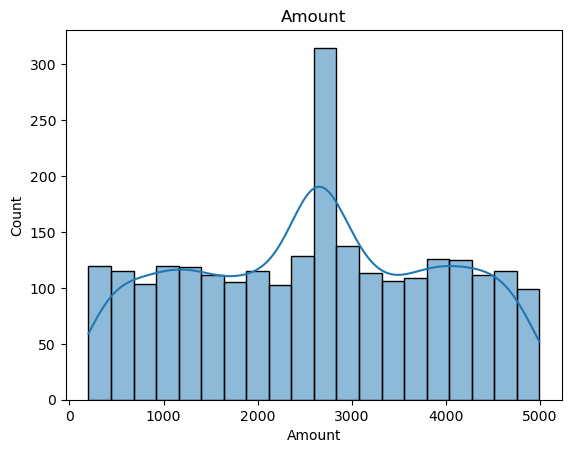

In [36]:
sbn.histplot(ds["Amount"],bins=20,kde=True)
py.title("Amount")

In [37]:
import scipy.stats as z_score
z_score=ds["Amount"]

In [38]:
outliers=(z_score < -3) | (z_score > 3)

In [39]:
total_outliers=outliers.sum()

In [40]:
print(total_outliers)

2500


In [41]:
num_col=["Amount"]
original_stats={}

In [42]:
for col in num_col:
    mean_val=ds[col].mean()
    ds[col]=ds[col].fillna(mean_val)
    std_val=ds[col].std()
    original_stats[col]=(mean_val,std_val)
    ds[col]=ds[col].clip(lower = mean_val -3 * std_val,upper = mean_val + 3 * std_val)
    print(f"clipped value in {col}")

clipped value in Amount


In [43]:
for col in num_col:
    mean_val,std_val=original_stats[col]
    lower_bound=mean_val-3*std_val
    upper_bound=mean_val+3*std_val
    outliers_remaining=ds[(ds[col] > upper_bound)|(ds[col] < lower_bound)].shape[0]
    if outliers_remaining==0:
        print(f"remaining value {outliers_remaining} in {col}")
    else:
        print("Outliers is there")  

remaining value 0 in Amount


In [44]:
ds.to_csv("Pro_Purchase_details(C).csv",index=False)

In [45]:
dcs=ps.read_csv("Pro_Purchase_details(C).csv")
